In [2]:
# randomly simulate a binary tree of size 5

import sys, os

sys.path.append("/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/spectraltree")

import generation
import reconstruct_tree
import time
import utils
import pandas as pd

n = 5
tree = utils.unrooted_birth_death_tree(n)

In [25]:
import dendropy
import numpy as np
import matplotlib.pyplot as plt

In [71]:
tree.print_plot()

                                                  /------------------------- T4
/-------------------------------------------------+                            
|                                                 \------------------------- T1
+                                                                              
|                                                 /------------------------- T3
|                        /------------------------+                            
\------------------------+                        \------------------------- T5
                         |                                                     
                         \-------------------------------------------------- T2
                                                                               
                                                                               


In [79]:
# let's simulate some sequences
m = 10
seqs, metadata = generation.simulate_sequences(m, tree_model=tree, seq_model=generation.Jukes_Cantor(), mutation_rate=0.1, alphabet="DNA")

char_mat = utils.array2charmatrix(seqs, metadata)

ch_list = list()
for t in char_mat.taxon_namespace:
    ch_list.append([x.symbol for x in char_mat[t]])
ch_arr = np.array(ch_list)

([<matplotlib.axis.XTick at 0x2afb0062e5d0>,
 <a list of 5 Text major ticklabel objects>)

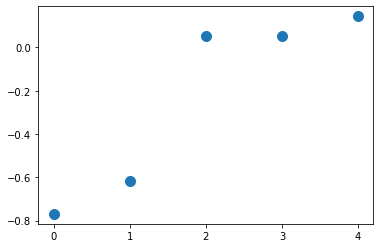

In [82]:
HKY_sim = reconstruct_tree.HKY_similarity_matrix(seqs, metadata)

# compute the second eigenvector of the similarity matrix and plot it
w, v = np.linalg.eigh(HKY_sim)

plt.plot(v[:,-2], ".", markersize = 20)
plt.xticks([0, 1, 2, 3, 4])

In [91]:
str(metadata)

"['T4', 'T1', 'T3', 'T5', 'T2']"

In [83]:
pd.DataFrame(ch_arr)

,0,1,2,3,4,5,6,7,8,9
0,C,T,G,T,T,G,T,C,T,A
1,A,T,G,T,T,C,T,A,C,A
2,C,T,G,T,T,C,T,A,C,A
3,C,T,G,T,G,G,C,T,T,A
4,C,T,G,T,T,C,T,A,C,A


In [84]:
HKY_sim

array([[1.        , 0.11890707, 0.01800234, 0.01800234, 0.        ],
       [0.11890707, 1.        , 0.20462554, 0.20462554, 0.08725854],
       [0.01800234, 0.20462554, 1.        , 1.        , 0.64455316],
       [0.01800234, 0.20462554, 1.        , 1.        , 0.64455316],
       [0.        , 0.08725854, 0.64455316, 0.64455316, 1.        ]])

In [86]:
spectral_method = reconstruct_tree.SpectralTreeReconstruction(reconstruct_tree.NeighborJoining, reconstruct_tree.JC_similarity_matrix)
        
tree_rec = spectral_method.deep_spectral_tree_reconstruction(seqs, reconstruct_tree.JC_similarity_matrix, 
                                                            taxa_metadata = metadata,
                                                            threshhold = 3, min_split = 2, verbose = True)

253428.0 KB
partition
L1 size:  3
L2 size:  2
253428.0 KB
--- 0.0003039836883544922 seconds ---
253428.0 KB
--- 0.0003268718719482422 seconds ---
253428.0 KB
len(bipartitions1) 5
one
one - merging:  1  out of:  3
len(bipartitions2) 3
one
one - merging:  1  out of:  2


In [87]:
tree_rec.print_plot()

                         /-------------------------------------------------- T2
/------------------------+                                                     
|                        |                        /------------------------- T3
|                        \------------------------+                            
+                                                 \------------------------- T5
|                                                                              
|                                                 /------------------------- T4
\-------------------------------------------------+                            
                                                  \------------------------- T1
                                                                               
                                                                               
